In [129]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np

dirname=os.path.dirname(os.path.abspath('__file__'))
filename=os.path.join(dirname,'recipesData.json')
df=pd.read_json(filename)

test ohad branch

In [99]:
df.keys()

Index(['_id', 'ratingData', 'name', 'datePublished', 'description',
       'recipeYield', 'recipeIngredient', 'recipeInstructions',
       'recipeCategory', 'nutrition', 'category', 'Tatcategory', 'RecId',
       'link', 'rating', 'img', 'prepTimeVal', 'cookTimeval', 'totalTimeVal',
       'ratingCount', 'bestRating', 'worstRating', 'video'],
      dtype='object')

In [37]:
df.head()

,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,...,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, ...",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this e...,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clo...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '47.4 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/23945/hot-ar...,4.400000,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, ...",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the f...,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 o...",[{'text': 'Place the avocados into a mixing bo...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '86 calories', 'carbohydrateConte...",...,https://www.allrecipes.com/recipe/161178/party...,4.461538,https://imagesvc.meredithcorp.io/v3/mm/image?u...,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58},...",Magaricz,2000-08-15T14:05:21.000Z,This is my Russian grandmother's version of It...,10 servings,"[¼ cup olive oil, 1 large eggplant, peeled and...","[{'text': 'Place eggplant in a colander, light...","[Side Dish, Vegetables, Eggplant]","{'calories': '76.6 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/20945/magaricz/,4.473684,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,40,120,19,5,1,NaN
3,{'$oid': '5fc3b88113f48bef0f019a37'},"[{'rating': 5, 'count': 8, 'percentage': 53}, ...",Christmas Chip Dip,2018-03-21T16:17:41.000Z,The simplest dip in festive colors for Christm...,16 servings,"[2 cups softened cream cheese, 1 (6.5 ounce) j...","[{'text': 'Spread cream cheese in a clear, sha...","[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '117.8 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/24301/christ...,4.333333,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,0,5,15,5,1,NaN
4,{'$oid': '5fc3b88113f48bef0f019a39'},"[{'rating': 5, 'count': 11, 'percentage': 61},...",Christmas Dip,2019-04-02T06:50:26.000Z,"A creamy layered dip that looks beautiful, esp...",4 cups,"[1 (6 ounce) package dried cranberries, 1 cup ...",[{'text': 'Reserve 1 tablespoon of dried cranb...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '142.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/165246/chris...,4.277778,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,0,140,18,5,1,NaN


In [83]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.0,39040.0
mean,112895.666086,4.371487,17.218673,38.983145,116.662935,143.393161,5.0,1.0
std,95889.028504,0.364167,157.304697,80.251754,647.063189,475.474423,0.0,0.0
min,6663.000000,1.315789,0.000000,0.000000,0.000000,10.000000,5.0,1.0
25%,19107.500000,4.200000,10.000000,5.000000,24.000000,20.000000,5.0,1.0
50%,78021.500000,4.449015,15.000000,20.000000,45.000000,41.000000,5.0,1.0
75%,220546.750000,4.619048,20.000000,40.000000,85.000000,106.000000,5.0,1.0
max,282261.000000,5.000000,30240.000000,3000.000000,30310.000000,19033.000000,5.0,1.0


In [121]:
from scipy import stats
# df=df[(np.abs(stats.zscore(df[["rating","totalTimeVal"]])) < 3).all(axis=1)]
# df=df[df.totalTimeVal > 1 ]
# df=df[df.totalTimeVal < 1000 ]
df = df.loc[(df['totalTimeVal'] >= 2) & (df['totalTimeVal'] <= 1000)]

In [111]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,34408.000000,34408.000000,34408.000000,34408.000000,34408.000000,34408.000000,34408.0,34408.0
mean,123903.710649,4.382584,17.841781,42.726546,91.143426,148.472913,5.0,1.0
std,94897.903061,0.359398,19.647556,75.494823,123.948642,497.433192,0.0,0.0
min,6664.000000,1.315789,0.000000,0.000000,2.000000,10.000000,5.0,1.0
25%,23733.750000,4.210526,10.000000,10.000000,30.000000,19.000000,5.0,1.0
50%,99463.500000,4.457447,15.000000,22.000000,50.000000,41.000000,5.0,1.0
75%,222928.250000,4.626892,20.000000,45.000000,90.000000,107.000000,5.0,1.0
max,282261.000000,5.000000,900.000000,840.000000,1000.000000,19033.000000,5.0,1.0


In [45]:
df

,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,...,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, ...",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this e...,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clo...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '47.4 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/23945/hot-ar...,4.400000,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, ...",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the f...,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 o...",[{'text': 'Place the avocados into a mixing bo...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '86 calories', 'carbohydrateConte...",...,https://www.allrecipes.com/recipe/161178/party...,4.461538,https://imagesvc.meredithcorp.io/v3/mm/image?u...,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58},...",Magaricz,2000-08-15T14:05:21.000Z,This is my Russian grandmother's version of It...,10 servings,"[¼ cup olive oil, 1 large eggplant, peeled and...","[{'text': 'Place eggplant in a colander, light...","[Side Dish, Vegetables, Eggplant]","{'calories': '76.6 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/20945/magaricz/,4.473684,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,40,120,19,5,1,NaN
3,{'$oid': '5fc3b88113f48bef0f019a37'},"[{'rating': 5, 'count': 8, 'percentage': 53}, ...",Christmas Chip Dip,2018-03-21T16:17:41.000Z,The simplest dip in festive colors for Christm...,16 servings,"[2 cups softened cream cheese, 1 (6.5 ounce) j...","[{'text': 'Spread cream cheese in a clear, sha...","[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '117.8 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/24301/christ...,4.333333,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,0,5,15,5,1,NaN
4,{'$oid': '5fc3b88113f48bef0f019a39'},"[{'rating': 5, 'count': 11, 'percentage': 61},...",Christmas Dip,2019-04-02T06:50:26.000Z,"A creamy layered dip that looks beautiful, esp...",4 cups,"[1 (6 ounce) package dried cranberries, 1 cup ...",[{'text': 'Reserve 1 tablespoon of dried cranb...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '142.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/165246/chris...,4.277778,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,0,140,18,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39035,{'$oid': '5fc519d9d38145ece7ebfc34'},"[{'rating': 5, 'count': 314, 'percentage': 61}...",Waikiki Meatballs,2020-03-05T04:56:32.000Z,"Beef meatballs flavored with ground ginger, si...",6 servings,"[1 ½ pounds ground beef, ⅔ cup crushed saltine...","[{'text': 'In a large bowl, combine ground bee...","[Main Dish Recipes, Meatball Recipes]","{'calories': '441.9 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/25197/waikik...,4.443359,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,25,45,512,5,1,NaN
39036,{'$oid': '5fc519d9d38145ece7ebfc35'},"[{'rating': 5, 'count': 85, 'percentage': 40},...",Wonderful Meatloaf,2000-01-12T22:38:46.000Z,This is my all time favorite recipe for meatlo...,4 servings,"[1 pound ground beef, ¾ cup cooked rice, 1 tab...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Main Dish Recipes, Meatloaf Recipes, Beef Mea...","{'calories': '441.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/16353/wonder...,3.985782,https://imagesvc.meredithcorp.io/v

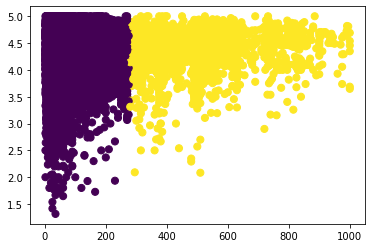

In [122]:
time_df=df[["rating","totalTimeVal"]]


kmeans = KMeans(n_clusters=2, random_state=0).fit(time_df)
y_kmeans = kmeans.predict(time_df)
# centers = kmeans.cluster_centers_
plt.scatter(time_df.iloc[:, 1], time_df.iloc[:,0], c=y_kmeans, s=50, cmap="viridis")
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#y_kmeans

In [130]:


df['instructionsCount'] = df['recipeInstructions'].apply(lambda x: len(x))
df['recipeCount'] = df['recipeIngredient'].apply(lambda x: len(x))

# create a new column for percentiles
df['pct_totalTimeVal'] = df['totalTimeVal'].rank(pct=True).apply(lambda x: float(x))
df['pct_recipeCount'] = df['recipeCount'].rank(pct=True).apply(lambda x: float(x))
df['pct_instructionsCount'] = df['instructionsCount'].rank(pct=True).apply(lambda x: float(x))
# create a new column for difficulty
df['difficulty'] = df['pct_instructionsCount'] * df['pct_recipeCount'] * df['pct_totalTimeVal']

In [131]:
pd.options.display.float_format = '{:20,.2f}'.format
df.round(4)
df['difficulty'].sort_values(ascending=True)
df['difficulty'].describe()

count              37,712.00
mean                    0.16
std                     0.19
min                     0.00
25%                     0.02
50%                     0.08
75%                     0.24
max                     0.98
Name: difficulty, dtype: float64

 - filter user ratings the recipes are not in the current df 
 - count recipes per user
 - calculate the difficulty of all the recipes he rated (sum of the recipes and devide by sum of the difficulty)
 - regression
